In [58]:
import numpy as np
from filterpy.kalman import ExtendedKalmanFilter as EKF

import seaborn as sns
from copy import deepcopy
from math import log, exp, sqrt
import sys
import numpy as np
from numpy import dot, zeros, eye
import scipy.linalg as linalg
from filterpy.stats import logpdf
from filterpy.common import pretty_str, reshape_z
import os, sys
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman import ExtendedKalmanFilter as EKF
import pickle
import matplotlib.pyplot as plt
from copy import deepcopy
#from Calibrate_Parameter_Auto.three_parameter.component.calibrate_three_para import Looper
from component.calibrate_three_para import Looper

plt.rcParams['font.size'] = 16

In [59]:
# import component
from component.ekf import *
import seaborn as sns

In [57]:
para_t30_s30 = {'alpha': 0.11038616513943347,
  'lambda': 15.373076283260879,
  'p': 0.1935617369507943,
  'rho_max': 0.14919587873307358}

In [13]:
data

{'para': {'alpha': 0.11038616513943347,
  'lambda': 15.373076283260879,
  'p': 0.1935617369507943,
  'rho_max': 0.14919587873307358},
 'qMat': array([[0.5       , 0.6       , 0.36666667, ..., 0.33333333, 0.36666667,
         0.06666667],
        [0.5       , 0.56666667, 0.4       , ..., 0.3       , 0.36666667,
         0.1       ],
        [0.46666667, 0.56666667, 0.36666667, ..., 0.3       , 0.36666667,
         0.16666667],
        ...,
        [0.36666667, 0.43333333, 0.43333333, ..., 0.33333333, 0.46666667,
         0.36666667],
        [0.33333333, 0.43333333, 0.43333333, ..., 0.33333333, 0.43333333,
         0.33333333],
        [0.3       , 0.46666667, 0.36666667, ..., 0.43333333, 0.36666667,
         0.33333333]]),
 'rhoMat': array([[0.04572377, 0.05805528, 0.04772718, ..., 0.06945136, 0.06631546,
         0.00862229],
        [0.05073493, 0.05563693, 0.05107443, ..., 0.0762107 , 0.05753505,
         0.01493613],
        [0.04497876, 0.04975944, 0.04445347, ..., 0.06691567, 0.0

In [66]:
# NGSIM DATA
with open('./data/NGSIM/US101_lane1_t10s30.pickle', 'rb') as f:
    data = pickle.load(f)

# LF solver
rho_22 = data['rhoMat']
q_22 = data['qMat']
rho = rho_22
q = q_22
    
dx = data['s'][1] - data['s'][0]



Aggregate_5 = False
if Aggregate_5:
    rho = np.zeros((5, rho.shape[1]))
    q = np.zeros((5, rho.shape[1]))
    for i in range(5):
        for j in range(rho.shape[1]):
            sub_rho = rho_22[i:i+5,j]
            sub_q = q_22[i:i+5]
            rho[i,j] = np.average(sub_rho)
            q[i,j] = np.average(sub_q)
            dx = (data['s'][1] - data['s'][0])*5



dt = data['t'][1] - data['t'][0]
#dt = dt / 10
#para = para_t30_s30

N = rho.shape[0]
T = rho.shape[1]
print('dt=', dt)
print('dx=', dx)
print('N=', N)
print('T=', T)
print('dx/dt', dx/dt)

# KF
config_kf_init = {'std_Q':0.0001,
                  'std_R':0.01,
                  #'init_rho': np.ones(rho.shape[0])*0.03,
                  'init_rho': rho[:,0],
                  'init_P': np.cov(rho)}

dt= 10.009025270758123
dx= 29.62194824347826
N= 22
T= 265
dx/dt 2.959523774010272


In [64]:
data['t']

[40.03610108303249,
 50.045126353790614,
 60.05415162454874,
 70.06317689530687,
 80.07220216606498,
 90.0812274368231,
 100.09025270758123,
 110.09927797833936,
 120.10830324909747,
 130.1173285198556,
 140.12635379061373,
 150.13537906137185,
 160.14440433212997,
 170.15342960288808,
 180.1624548736462,
 190.17148014440434,
 200.18050541516246,
 210.18953068592057,
 220.19855595667872,
 230.20758122743683,
 240.21660649819495,
 250.22563176895306,
 260.2346570397112,
 270.2436823104693,
 280.25270758122747,
 290.2617328519856,
 300.2707581227437,
 310.2797833935018,
 320.28880866425993,
 330.29783393501805,
 340.30685920577616,
 350.3158844765343,
 360.3249097472924,
 370.33393501805057,
 380.3429602888087,
 390.3519855595668,
 400.3610108303249,
 410.37003610108303,
 420.37906137184115,
 430.38808664259926,
 440.39711191335743,
 450.40613718411555,
 460.41516245487367,
 470.4241877256318,
 480.4332129963899,
 490.442238267148,
 500.45126353790613,
 510.46028880866425,
 520.469314079

In [393]:
data

{'para': {'alpha': 0.11038616513943347,
  'lambda': 15.373076283260879,
  'p': 0.1935617369507943,
  'rho_max': 0.14919587873307358},
 'qMat': array([[0.5       , 0.6       , 0.36666667, ..., 0.33333333, 0.36666667,
         0.06666667],
        [0.5       , 0.56666667, 0.4       , ..., 0.3       , 0.36666667,
         0.1       ],
        [0.46666667, 0.56666667, 0.36666667, ..., 0.3       , 0.36666667,
         0.16666667],
        ...,
        [0.36666667, 0.43333333, 0.43333333, ..., 0.33333333, 0.46666667,
         0.36666667],
        [0.33333333, 0.43333333, 0.43333333, ..., 0.33333333, 0.43333333,
         0.33333333],
        [0.3       , 0.46666667, 0.36666667, ..., 0.43333333, 0.36666667,
         0.33333333]]),
 'rhoMat': array([[0.04572377, 0.05805528, 0.04772718, ..., 0.06945136, 0.06631546,
         0.00862229],
        [0.05073493, 0.05563693, 0.05107443, ..., 0.0762107 , 0.05753505,
         0.01493613],
        [0.04497876, 0.04975944, 0.04445347, ..., 0.06691567, 0.0

In [4]:
with open('./data/NGSIM/US101_lane1_t30s30.pickle', "rb") as f:
    rho_q = pickle.load(f)
    rho_mat = rho_q['rhoMat']
    q_mat = rho_q['qMat']

In [67]:
LOOPS = {'2':[0, 11],
         '4':[0, 6, 11, 16],
         '6':[0, 4, 7, 11, 15, 18],
         '8':[0, 3, 6, 8, 11, 14, 16, 19],
         '10':[0, 2, 4, 7, 9, 11, 13, 15, 18, 20],
         '12':[0, 2, 4, 6, 7, 9, 11, 13, 15, 16, 18, 20],
         '14':[0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 17, 19, 20],
         '16':[0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 21],
         '18':[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21]}

In [7]:
looper = Looper(rho, q)

L= 22
T= 89


In [8]:
looper._get_loop_data()

location of loop: [0, 7, 15]


In [12]:
for keys in LOOPS.keys():
    num = int(keys)
    looper.init_pos(offset=0, n_loop=num)
    looper._get_loop_data()
    
    LOOPS[keys] = looper.loop_locs

location of loop: [0, 11]
location of loop: [0, 6, 11, 16]
location of loop: [0, 4, 7, 11, 15, 18]
location of loop: [0, 3, 6, 8, 11, 14, 16, 19]
location of loop: [0, 2, 4, 7, 9, 11, 13, 15, 18, 20]
location of loop: [0, 2, 4, 6, 7, 9, 11, 13, 15, 16, 18, 20]
location of loop: [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 17, 19, 20]
location of loop: [0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 21]
location of loop: [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21]


In [10]:
LOOPS

{'10': [0, 2, 4, 6, 8, 11, 13, 15, 17, 21],
 '12': [0, 1, 3, 5, 7, 9, 11, 12, 14, 16, 18, 21],
 '14': [0, 1, 3, 4, 6, 7, 9, 11, 12, 14, 15, 17, 18, 21],
 '16': [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 15, 16, 17, 19, 21],
 '18': [0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 21],
 '2': [0, 21],
 '4': [0, 5, 11, 21],
 '6': [0, 3, 7, 11, 14, 21],
 '8': [0, 2, 5, 8, 11, 13, 16, 21]}

In [44]:
LOOPS = {'2':[0, 20],
         '4':[0, 5, 11, 20],
         '6':[0, 3, 7, 11, 14, 20],
         '8':[0, 2, 5, 8, 11, 13, 16, 20],
         '10':[0, 2, 4, 6, 8, 11, 13, 15, 17, 20],
         '12':[0, 1, 3, 5, 7, 9, 11, 12, 14, 16, 18, 20],
         '14':[0, 1, 3, 4, 6, 7, 9, 11, 12, 14, 15, 17, 18, 20],
         '16':[0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 15, 16, 17, 19, 20],
         '18':[0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20]}

In [15]:
# SIMULATION DATA
rho = np.loadtxt('./data/lf/rho_bell_mag_075.csv', delimiter=',')
rho = rho[:,:-1]
q = np.loadtxt('./data/lf/u_bell_mag_075.csv', delimiter=',')



N = rho.shape[0]
T = rho.shape[1]
dt = 3/T
dx = 1/N
LOOPS_sim = LOOPS
for key, value in LOOPS.items():
    LOOPS_sim[key] = [x*10 for x in value]
for key in LOOPS_sim.keys():
    print(key)

2
4
6
8
10
12
14
16
18


In [72]:
q.shape

(22, 89)

In [78]:
# loops

LOOPS = {'2':[0, 21],
         '4':[0, 5, 11, 21],
         '6':[0, 3, 7, 11, 14, 21],
         '8':[0, 2, 5, 8, 11, 13, 16, 21],
         '10':[0, 2, 4, 6, 8, 11, 13, 15, 17, 21],
         '12':[0, 1, 3, 5, 7, 9, 11, 12, 14, 16, 18, 21],
         '14':[0, 1, 3, 4, 6, 7, 9, 11, 12, 14, 15, 17, 18, 21],
         '16':[0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 15, 16, 17, 19, 21],
         '18':[0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 21]}

# get parameters



In [5]:
config_kf_init

{'init_P': array([[ 3.21712457e-04,  2.52215420e-04,  1.96023361e-04,
          1.82029123e-04,  1.11588156e-04,  5.84419351e-05,
          5.06997698e-06, -3.90271569e-05, -3.72208739e-05,
         -6.40398776e-06, -7.04520739e-06, -3.41284160e-06,
         -1.30175058e-05,  6.59713920e-06,  1.13536680e-06,
         -1.30075956e-06,  1.87325165e-06,  3.67655235e-06,
         -1.09948594e-06,  7.37210998e-06, -8.17146345e-07,
         -8.73078936e-06],
        [ 2.52215420e-04,  2.65358035e-04,  2.18832088e-04,
          1.90171024e-04,  1.39033021e-04,  8.88708260e-05,
          3.93107094e-05, -1.54464102e-05, -1.82351193e-05,
          9.98396998e-06,  1.25396180e-05,  5.75871112e-07,
         -8.06654509e-06,  4.78415913e-06,  4.26011613e-06,
         -1.67951705e-06, -1.00692268e-05, -8.22662429e-06,
         -1.22720439e-05, -8.30749903e-06, -1.15132280e-05,
         -1.38981212e-05],
        [ 1.96023361e-04,  2.18832088e-04,  2.46280948e-04,
          2.15411392e-04,  1.7000266

In [181]:
np.eye(len(loops))

array([[1., 0.],
       [0., 1.]])

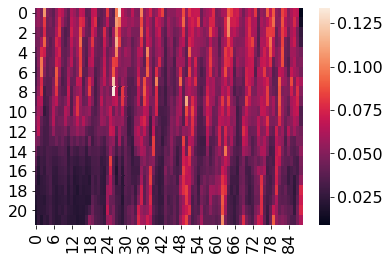

In [412]:
sns.heatmap(rho)loop_locs

In [431]:
q.shape

In [77]:
def implement_kf(N, loops, rho, config, **f_kwargs):
    std_Q = config['std_Q']
    std_R = config['std_R']
    init_rho = config['init_rho']
    init_P = config['init_P']

    lwrefk = LWREKF(N,len(loops),std_Q, std_R)
    lwrefk.x = init_rho
    lwrefk.P = init_P
    X_pri = [lwrefk.x]
    X_pos = [lwrefk.x]
    Obs = []
    K = []
    P = []
    for i in range(rho.shape[1] - 1):
        lwrefk.predict(Fjacobian, f_at, **f_kwargs)
        X_pri.append(lwrefk.x_prior)

        if i % 1 == 0:
            observe = [rho[k, i + 1] for k in loops]
            Obs.append(observe)
            lwrefk.update(observe, Hjacobian, h_at, args=(N, loops),hx_args=(loops))
            #lwrefk.x = neibour_avg(lwrefk.x)
            lwrefk.x_post = lwrefk.x

        else:
            # X_pos.append(lwrefk.x_prior)
            pass
        K.append(lwrefk.K)
        P.append(lwrefk.P)
        X_pos.append(lwrefk.x_post)
    X_pos = np.vstack(X_pos).T
    X_pri = np.vstack(X_pri).T

    return X_pri, X_pos, K, P

In [5]:
def implement_kf(N, loops, rho, config, **f_kwargs):
    std_Q = config['std_Q']
    std_R = config['std_R']
    init_rho = config['init_rho']
    init_P = config['init_P']

    lwrefk = LWREKF(N,len(loops),std_Q, std_R)
    lwrefk.x = init_rho
    lwrefk.P = init_P
    X_pri = [lwrefk.x]
    X_pos = [lwrefk.x]
    Obs = []
    K = []
    P = []
    for i in range((rho.shape[1] - 1)*10):
        lwrefk.predict(Fjacobian, f_at, **f_kwargs)
        X_pri.append(lwrefk.x_prior)
        
        if i % 10 == 0:
            observe = [rho[k, int(i/10) + 1] for k in loops]
            Obs.append(observe)
            
        lwrefk.update(observe, Hjacobian, h_at, args=(N, loops),hx_args=(loops))
        #lwrefk.x = neibour_avg(lwrefk.x)
        lwrefk.x_post = lwrefk.x
        if i % 10 == 0:
            X_pos.append(lwrefk.x_post)
        #else:
            # X_pos.append(lwrefk.x_prior)
        #    pass
        K.append(lwrefk.K)
        P.append(lwrefk.P)
        
    X_pos = np.vstack(X_pos).T
    X_pri = np.vstack(X_pri).T

    return X_pri, X_pos, K, P

In [7]:
np.isnan(X_pos).any()

NameError: name 'X_pos' is not defined

In [10]:
np.random.uniform(0,1,20)

array([0.15065745, 0.1781247 , 0.37335228, 0.47039246, 0.27956508,
       0.83334411, 0.03006389, 0.00425474, 0.49109572, 0.55729332,
       0.1489159 , 0.45933222, 0.39307747, 0.2576063 , 0.96350691,
       0.9515963 , 0.5175609 , 0.3193414 , 0.98559544, 0.60523478])

In [20]:
Init_Condition = np.array([0.01105692, 0.10677118, 0.02237895, 0.14490733, 0.03456982,
       0.08497771, 0.11113467, 0.05802255, 0.04491291, 0.08446965,
       0.0880051 , 0.06941019, 0.01733262, 0.13411312, 0.12563544,
       0.14444642, 0.11212587, 0.0083383 , 0.03194814, 0.05336034,
       0.06841143, 0.05961973])

In [39]:
Init_Condition = np.array([0.0944065 , 0.11128405, 0.19039435, 0.13904724, 0.04033871,
       0.04224207, 0.06914484, 0.09973352, 0.13182918, 0.02397898,
       0.19251177, 0.17996789, 0.0160781 , 0.13391704, 0.10431825,
       0.19114107, 0.13736777, 0.16528447, 0.00790831, 0.1808261 ,
       0.06533874, 0.08240239])

In [42]:
np.random.uniform(0,0.1,22)

array([0.05974111, 0.03890619, 0.00098122, 0.07968484, 0.08147987,
       0.07297592, 0.06866752, 0.00294731, 0.08075916, 0.08051541,
       0.06029269, 0.08160808, 0.00224088, 0.05557777, 0.04341552,
       0.09409827, 0.01080081, 0.04703136, 0.01828329, 0.07548735,
       0.04980021, 0.04582908])

In [78]:
ReadRealPara = True

# KF
config_kf_init = {'std_Q':2,
                  'std_R':1,
                  #'init_rho': np.ones(rho.shape[0])*0.03,
                  'init_rho': np.array([0.03]*rho.shape[0]),
                  'init_P': np.eye(rho.shape[0])}

looper = Looper(rho, q)

Errors = []

#para
fitted_paras = []

for loops in LOOPS.values():
    
    #loops = [0, 21]
    loops = [0, 3, 6, 8, 11, 14, 16, 19]
    # para
    if ReadRealPara:
        para = para_t30_s30
    else:
        #loop
        looper.init_pos(loops)
        loop_locs, popts, popt_all = looper.calibrate(verbose=False)
        para = {'lambda': popt_all[0],
               'p': popt_all[1],
               'rho_max': popt_all[2],
               'alpha': popt_all[3]}
        print('lambda = {} \np = {} \nrho_max = {} \nalpha = {}'.format(popt_all[0]
                                                                            , popt_all[1]
                                                                            , popt_all[2]
                                                                            , popt_all[3]))
        fitted_paras.append(popt_all)
    
    #loop
    X_pri, X_pos, K, P = implement_kf(N, loops, rho, config_kf_init,
                                dx=dx,
                                dt=dt,
                                para=para)
    error_rho = np.linalg.norm(rho[:, :]-X_pos[:, :],2)/np.linalg.norm(rho[:, :],2)
    Errors.append(error_rho)
    break

L= 22
T= 265


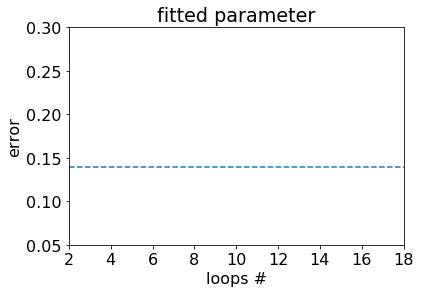

In [72]:
plt.rcParams['font.size'] = 16
plt.plot(Errors, '-*r')
ax = plt.gca()
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(LOOPS.keys()))
plt.title('fitted parameter')
plt.xlim([0,8])
plt.ylabel('error')
plt.xlabel('loops #')
#plt.yticks([i for i in np.arange(0,1.1,0.1)])
plt.ylim([0.05,0.3])
plt.plot([0,20],[0.14, 0.14], '--')

In [56]:
Errors

[0.4201882622315412,
 0.20110888089173942,
 0.16930401775865161,
 0.16839413057579092,
 0.16133595969404826,
 0.15564896592031485,
 0.15055038311728913,
 0.14530003688696727,
 0.1431250126828455]

In [494]:
P_temp = np.eye(22) * 1.59264
for i in range(P_temp.shape[0]):
    for j in range(P_temp.shape[1]):
        if i == j+2:
            P_temp[i,j] = 0.20368
        if j == i+2:
            P_temp[i,j] = `a0.20368
P_temp[0,1] = 0.0811
P_temp[1,0] = 0.0811
P_temp[-2,-1] = 0.51154
P_temp[-1,-2] = 0.51154

H_temp = np.zeros((2,22))
H_temp[0,0] = 1
H_temp[1,-1] = 1

PHT = np.dot(P_temp, H_temp.T)
R_temp = np.eye(2)

S = np.dot(H_temp, PHT) + R_temp

In [32]:
X_pos.shape

In [33]:
X_pri.shape

In [493]:
R_temp

array([[1., 0.],
       [0., 1.]])

In [33]:
X_pri[:, 0]

array([0.05      , 0.05      , 0.05000007, 0.05000419, 0.05007482,
       0.05089349, 0.05719479, 0.08928844, 0.2049375 , 0.5180494 ,
       0.7166204 , 0.6756365 , 0.4641444 , 0.2826163 , 0.14304948,
       0.07289393, 0.05373402, 0.0504102 , 0.05003041, 0.05000147,
       0.05      , 0.05      ])

2.7165884529698645e+64


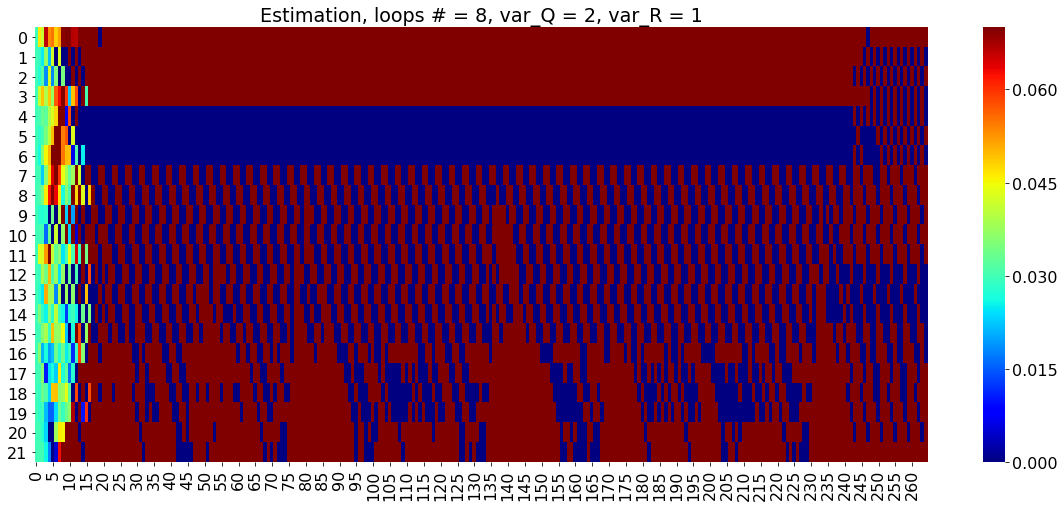

In [79]:
#%matplotlib widget
plt.figure(figsize=(20,8))
sns.heatmap(X_pos[:, :], vmin = 0, vmax=0.07,cmap='jet')
plt.title('Estimation, loops # = {}, var_Q = {}, var_R = {}'.format(len(loops),
                                                                   config_kf_init['std_Q'],
                                                                   config_kf_init['std_R']))
print(Errors[0])

0.18752218895866443


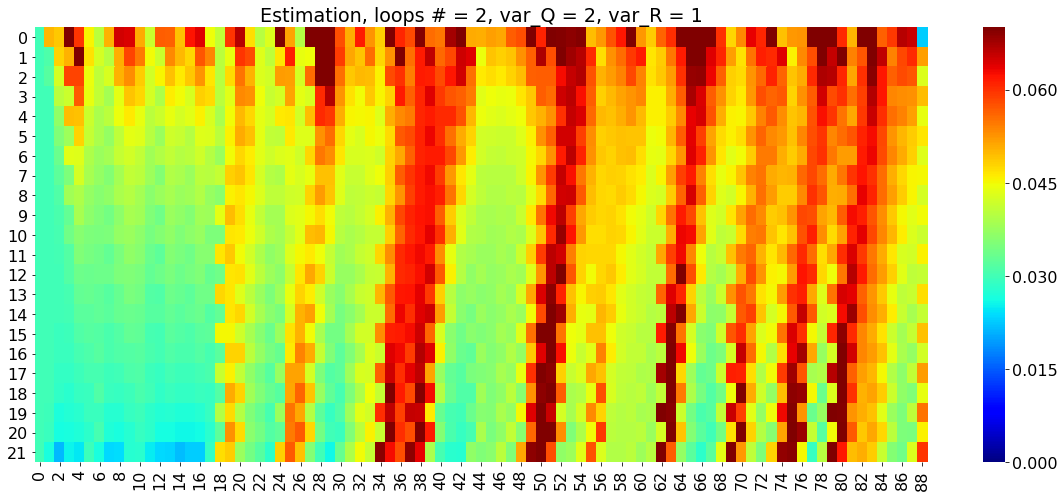

In [100]:
#%matplotlib widget
plt.figure(figsize=(20,8))
sns.heatmap(X_pos[:, :], vmin = 0, vmax=0.07,cmap='jet')
plt.title('Estimation, loops # = {}, var_Q = {}, var_R = {}'.format(len(loops),
                                                                   config_kf_init['std_Q'],
                                                                   config_kf_init['std_R']))
print(Errors[0])

0.12021801671805758


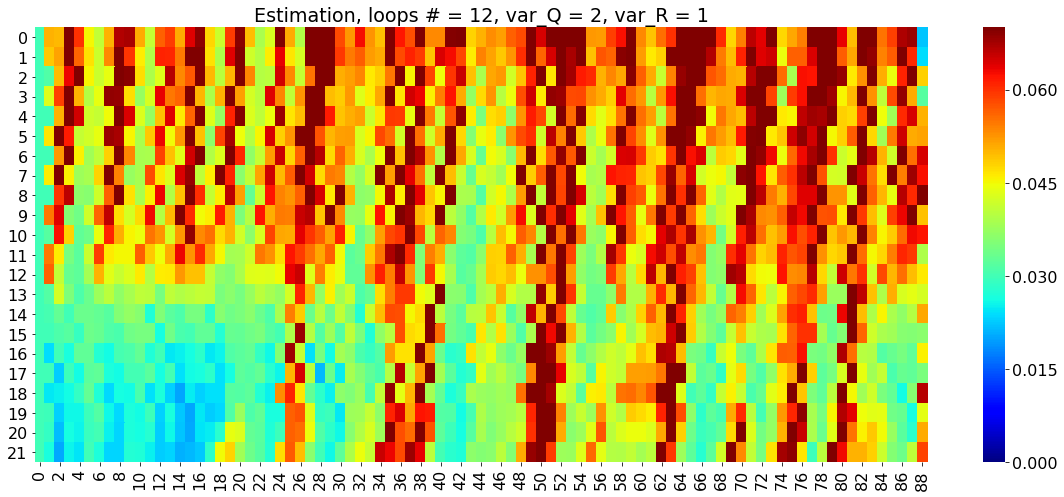

In [98]:
#%matplotlib widget
plt.figure(figsize=(20,8))
sns.heatmap(X_pos[:, :], vmin = 0, vmax=0.07,cmap='jet')
plt.title('Estimation, loops # = {}, var_Q = {}, var_R = {}'.format(len(loops),
                                                                   config_kf_init['std_Q'],
                                                                   config_kf_init['std_R']))
print(Errors[0])

Text(0.5, 1, 'Ground Truth')

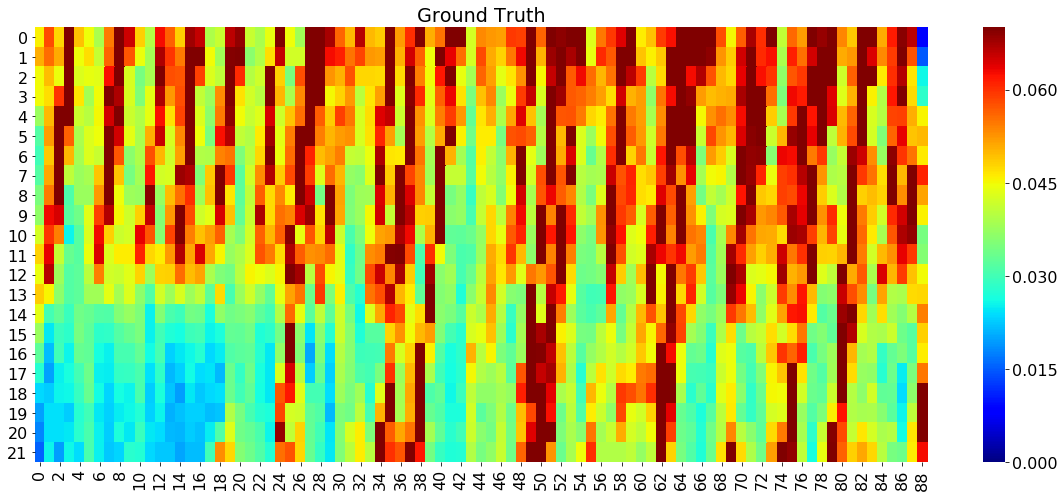

In [55]:
#%matplotlib widget
plt.figure(figsize=(20,8))
sns.heatmap(rho[:, :], vmin = 0, vmax=0.07,cmap='jet')
plt.title('Ground Truth')

In [422]:
rho.shape

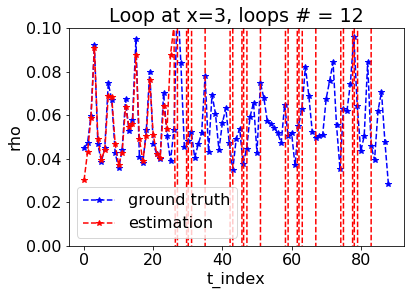

In [81]:
# focus on one loop
%matplotlib inline
#%matplotlib widget
look = 3
plt.rcParams['font.size'] = 16
plt.plot(rho[look,:], '--*b')
plt.plot(X_pos[look,:], '--*r')
plt.legend(['ground truth', 'estimation'])
plt.title('Loop at x={}, loops # = {}'.format(look,len(loops)))
plt.xlabel('t_index')
plt.ylabel('rho')
plt.ylim([0,0.1])

Text(0.5, 1.0, 't=2')

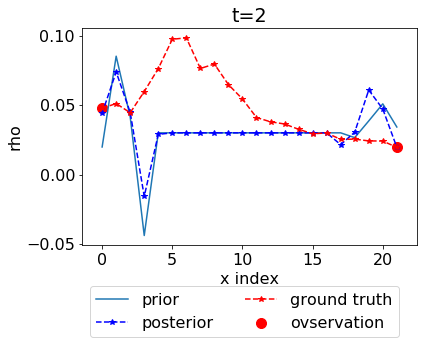

In [16]:
### %matplotlib inline
plt.rcParams['font.size'] = 16
idx = 2
plt.plot(X_pri[:,idx], )
plt.plot(X_pos[:,idx], '--*b')
plt.plot(rho[:, idx],'--*r')
plt.scatter(loops, rho[loops,idx], color = 'r',s = 100)
plt.legend(['prior','posterior','ground truth', 'ovservation'],
          bbox_to_anchor=(0, -0.15), loc='upper left', ncol=2)
plt.xlabel('x index')
plt.ylabel('rho')
plt.title('t={}'.format(idx))

In [11]:
import sympy
idx = 0
sympy.init_printing(use_latex=True)
sym_K = sympy.Matrix(np.around(F[idx], decimals=4))

sym_K

⎡-2.3354  3.3354     0.0      0.0      0.0      0.0      0.0      0.0      0.0
⎢                                                                             
⎢-2.3354    0.0    3.3354     0.0      0.0      0.0      0.0      0.0      0.0
⎢                                                                             
⎢  0.0    -2.3354    0.0    3.3354     0.0      0.0      0.0      0.0      0.0
⎢                                                                             
⎢  0.0      0.0    -2.3354    0.0    3.3354     0.0      0.0      0.0      0.0
⎢                                                                             
⎢  0.0      0.0      0.0    -2.3354    0.0    3.3354     0.0      0.0      0.0
⎢                                                                             
⎢  0.0      0.0      0.0      0.0    -2.3354    0.0    3.3354     0.0      0.0
⎢                                                                             
⎢  0.0      0.0      0.0      0.0      0.0    -2.335

In [75]:
X_pri[:,0]

array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])

In [79]:
X_pri[:,idx].shape

In [80]:
np.dot(F[idx] , X_pri[:,idx])

array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])

In [54]:
import sympy
idx = 0
sympy.init_printing(use_latex=True)
sym_K = sympy.Matrix(np.around(F[idx], decimals=4))

sym_K

NameError: name 'F' is not defined

In [268]:
X_pos[4,55]

In [38]:
len(K)

88

In [55]:
rho

array([[0.04572377, 0.05805528, 0.04772718, ..., 0.06945136, 0.06631546,
        0.00862229],
       [0.05073493, 0.05563693, 0.05107443, ..., 0.0762107 , 0.05753505,
        0.01493613],
       [0.04497876, 0.04975944, 0.04445347, ..., 0.06691567, 0.04664973,
        0.0258164 ],
       ...,
       [0.01993601, 0.02420587, 0.02419697, ..., 0.02550277, 0.04064362,
        0.07073123],
       [0.01791055, 0.02418127, 0.02411583, ..., 0.02624096, 0.04674419,
        0.07536718],
       [0.01553082, 0.02544252, 0.01955014, ..., 0.03372579, 0.0459396 ,
        0.062819  ]])

In [ ]:
def Hjacobian(x, N, loops):
    H_jacobian = np.zeros( (len(loops),N) )
    for i in range(len(loops)):
        H_jacobian[i, loops[i]] = 1
    return H_jacobian


In [86]:
K[0].shape

In [174]:
np.cov(rho,ddof=0)

array([[ 3.18097711e-04,  2.49381539e-04,  1.93820851e-04,
         1.79983852e-04,  1.10334356e-04,  5.77852841e-05,
         5.01301095e-06, -3.85886496e-05, -3.68026619e-05,
        -6.33203284e-06, -6.96604776e-06, -3.37449506e-06,
        -1.28712417e-05,  6.52301404e-06,  1.12260987e-06,
        -1.28614428e-06,  1.85220388e-06,  3.63524278e-06,
        -1.08713217e-06,  7.28927728e-06, -8.07964925e-07,
        -8.63269060e-06],
       [ 2.49381539e-04,  2.62376484e-04,  2.16373301e-04,
         1.88034271e-04,  1.37470852e-04,  8.78722774e-05,
         3.88690161e-05, -1.52728551e-05, -1.80302303e-05,
         9.87179054e-06,  1.23987234e-05,  5.69400650e-07,
        -7.97590975e-06,  4.73040453e-06,  4.21224966e-06,
        -1.66064607e-06, -9.95608947e-06, -8.13419031e-06,
        -1.21341557e-05, -8.21415635e-06, -1.13838659e-05,
        -1.37419625e-05],
       [ 1.93820851e-04,  2.16373301e-04,  2.43513747e-04,
         2.12991039e-04,  1.68092527e-04,  1.27229922e-04,
    

In [179]:
max(np.cov(rho,ddof=0).flatten())

In [250]:
# plot the extrem elements
%matplotlib widget
P_small = [min(Pi.flatten()) for Pi in P]; P_big = [max(Pi.flatten()) for Pi in P]
K_small = [min(Ki.flatten()) for Ki in K]; K_big = [max(Ki.flatten()) for Ki in K]


fig, ax1 = plt.subplots()

color = 'tab:red'
if False:
    ax1.set_xlabel('t index')
    ax1.set_ylabel('minimum element', color=color)
    ax1.plot(K_small, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

if True:
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('maximum element', color=color)  # we already handled the x-label with ax1
    ax2.plot(K_big, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('min/max element of K, loops # = {}'.format(len(loops)))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

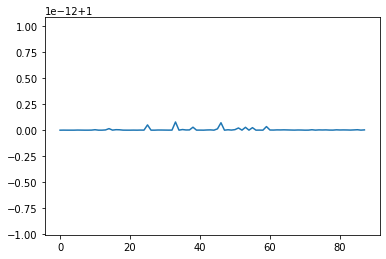

In [252]:
%matplotlib inline
plt.plot(K_big)

In [253]:
K_big

In [85]:
# plot the # of 0
P[80].flatten(0)

/home/zm2303/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


array([ 1.81649964e+00,  1.72895219e-01, -8.16325693e-01,  1.95133364e-01,
        1.60830471e-03,  9.39981492e-01,  1.18545914e-03, -2.28309061e-03,
        1.15238616e-01, -1.18928879e-02, -7.46247409e-02, -1.87736641e-02,
       -1.04389122e-03, -1.20997585e-01,  2.18250869e-03, -1.40465625e-03,
        2.72025460e-02, -2.11354729e-03,  1.49336148e-04, -1.92984007e-02,
        7.21435103e-03,  1.94288747e-04,  1.72895219e-01,  1.80755446e+00,
        6.60887919e-01, -2.19708765e-01, -3.17840048e-03, -1.05629649e+00,
       -2.37269515e-03,  2.88568649e-03, -2.31040508e-01,  1.58090060e-02,
        1.47928151e-01,  2.53279264e-02,  2.07896864e-03,  1.62125642e-01,
       -4.36564555e-03,  1.70421484e-03, -5.47704402e-02,  2.52007485e-03,
       -2.16076069e-04,  2.55450274e-02, -1.61416566e-02, -2.85543764e-04,
       -8.16325693e-01,  6.60887919e-01,  1.65654308e+01,  6.95502288e-01,
       -1.06460521e-01,  3.31128857e+00, -1.07088142e-01, -5.21405595e-03,
       -9.56241727e+00,  

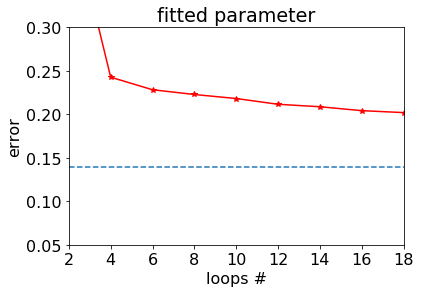

In [41]:
plt.rcParams['font.size'] = 16
plt.plot(Errors, '-*r')
ax = plt.gca()
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(LOOPS.keys()))
plt.title('fitted parameter')
plt.xlim([0,8])
plt.ylabel('error')
plt.xlabel('loops #')
#plt.yticks([i for i in np.arange(0,1.1,0.1)])
plt.ylim([0.05,0.3])
plt.plot([0,20],[0.14, 0.14], '--')


In [49]:
rho.shape

(21, 529)

In [33]:
Errors

[0.23551800908991752,
 0.16351895388060617,
 0.1491296220804627,
 0.14284457405383919,
 0.1418317331668404,
 0.13767203817222945,
 0.1279607844609588,
 0.12565080085286914,
 0.12684213210796902]

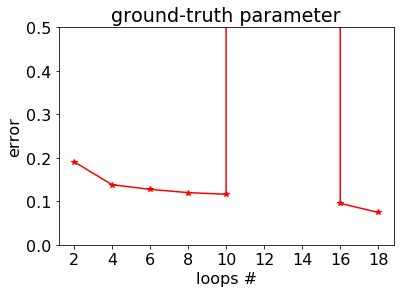

In [63]:
plt.plot(Errors, '-*r')
ax = plt.gca()
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(LOOPS.keys()))
plt.title('ground-truth parameter')
plt.ylabel('error')
plt.xlabel('loops #')
#plt.yticks([i for i in np.arange(0,1.1,0.1)])
plt.ylim([0,0.5])

Text(0.5, 0, 'loops #')

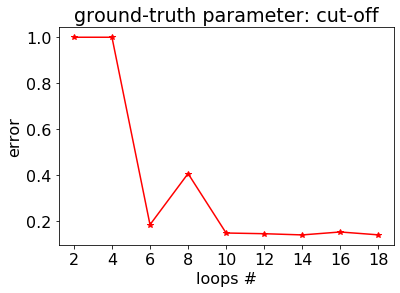

In [455]:
plt.plot(Errors, '-*r')
ax = plt.gca()
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(LOOPS.keys()))
plt.title('ground-truth parameter: cut-off')
plt.ylabel('error')
plt.xlabel('loops #')

In [74]:
# check the derivtive
def g(x, para):
    lamda = para['lambda']
    p = para['p']
    temp = 1 + lamda ** 2 * (x - p) ** 2
    return np.sqrt(temp)


def dg(x, para):
    lamda = para['lambda']
    p = para['p']
    numer = lamda ** 2 * (x - p)
    denum = g(x, para)
    return numer / denum


def q_of(rho, para):
    rho_max = para['rho_max']
    alpha = para['alpha']
    #
    a = g(0, para)
    b = g(1, para)
    c = g(rho / rho_max, para)
    Q = alpha * (a + (b - a) * rho / rho_max - c)

    # a = np.sqrt(1 + (lamda * p) ** 2)
    # b = np.sqrt(1 + (lamda * (1 - p)) ** 2)
    # y = lamda * (rho / rho_max - p)
    # Q = alpha * (a + (b - a) * rho / rho_max - np.sqrt(1 + y ** 2))
    return Q


def dq_of(rho, para):
    rho_max = para['rho_max']
    alpha = para['alpha']

    a = (g(1, para) - g(0, para)) / rho_max
    b = dg(rho / rho_max, para) / rho_max

    return alpha * (a - b)

Text(0, 0.5, 'q')

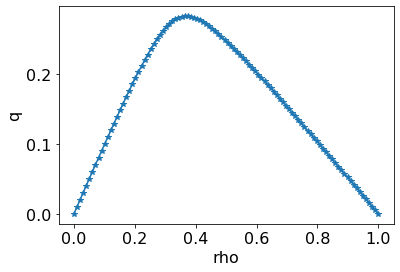

In [94]:
plt.rcParams['font.size'] = 16

x = np.linspace(0,1,100)
y = [q_of(i, data['para']) for i in x]
plt.plot(x,y, '-*')
plt.xlabel('rho')
plt.ylabel('q')


In [84]:
Dq = np.diff(y)
Drho = np.diff(x)
dq = Dq/Drho

In [85]:
dq_est = [dq_of(i, data['para']) for i in x[:-1]]

Text(0, 0.5, 'dq')

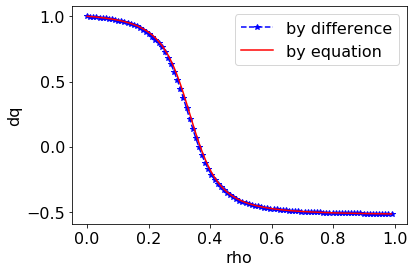

In [97]:
plt.figure()
plt.plot(x[:-1], dq, '--*b')
plt.plot(x[:-1], dq_est, 'r')

plt.legend(['by difference', 'by equation'])
plt.xlabel('rho')
plt.ylabel('dq')

In [36]:
config_kf_init = {'std_Q':1,
                  'std_R':0,
                  #'init_rho': np.ones(rho.shape[0])*0.03,
                  'init_rho': np.array([0.03]*rho.shape[0]),
                  'init_P': np.eye(rho.shape[0])}

In [40]:
def h_at(x, loops):
    return np.array([x[i] for i in loops])

In [34]:
# simple debug
def f_at(x, **kwargs):
    dx = kwargs['dx']
    dt = kwargs['dt']
    para = kwargs['para']
    x_l = np.zeros(x.shape)
    x_l[0] = x[0]
    x_l[1:] = x[:-1]

    x_r = np.zeros(x.shape)
    x_r[-1] = x[-1]
    x_r[:-1] = x[1:]

    # print('x:',x)
    # print('x_l', x_l)
    # print('x_r', x_r)

    #q_l = np.array(list(map(q_of, x_l)))
    q_l = np.array([q_of(x, para) for x in x_l])
    #q_r = np.array(list(map(q_of, x_r)))
    q_r = np.array([q_of(x, para) for x in x_r])

    q_pred = (x_l + x_r) / 2 - (dt / 2 / dx) * (q_r - q_l)
    return q_pred

In [35]:
loops

In [42]:
x_pri = np.array([0.03]*rho.shape[0])

In [43]:
z = rho[loops,0]

In [45]:
Hx = h_at(x_pri, loops)

In [46]:
z-Hx

array([ 1.57237686e-02,  1.49787551e-02,  7.52438431e-03,  3.58257340e-05,
        4.86504012e-03,  1.80350722e-02,  1.84914131e-02,  7.50379937e-03,
       -2.24692957e-03, -1.44691843e-02])